In [141]:
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt

In [134]:
def normalize_r(series):
    
    nor_series = series.copy(deep=True)
    for idx, val in series.iteritems():
        nor_series[idx] =  (series.min()-val) / (series.max() - series.min()) + 1
        
    return nor_series
    
def normalize(series):
    
    nor_series = series.copy(deep=True)
    for idx, val in series.iteritems():
        nor_series[idx] = (val - series.min()) / (series.max() - series.min())
        
    return nor_series

In [44]:
import datetime
demand = os.path.join(data, 'original_data', 'demand_related')
# Loaded data is the accumulated death per county
death_case = pd.read_excel(os.path.join(demand, 'Texas COVID-19 Fatality Count Data by County.xlsx'),
                             sheet_name='Fatalities by County 2020',
                             header=2,
                             index_col=0)

In [149]:
from_date = '2020-05-01'
to_date = '2021-12-31'

start_date = datetime.datetime.strptime(from_date,  "%Y-%m-%d")
end_date = datetime.datetime.strptime(to_date,  "%Y-%m-%d")

focus_date = []
focus_date_death = []
delta = datetime.timedelta(days=1)
while start_date <= end_date:
    focus_date.append(start_date.strftime("%Y-%m-%d"))
    focus_date_death.append(start_date.strftime("%m/%d/%Y"))
    start_date += delta

In [150]:
# Calculate daily death from the accumulated value
daily_death = pd.DataFrame(index=death_case.index, columns=focus_date_death[1:])

for i, date in enumerate(focus_date_death):
    if i != 0:
        daily_death[date] = death_case[date] - death_case[focus_date_death[i -1]]

# Remove negative value of daily death. 
# Negative value has replaced with 0
for col in daily_death.columns:
    daily_death[col] = daily_death[col].mask(daily_death[col] < 0, 0)
        
daily_death

,05/02/2020,05/03/2020,05/04/2020,05/05/2020,05/06/2020,05/07/2020,05/08/2020,05/09/2020,05/10/2020,05/11/2020,...,12/22/2021,12/23/2021,12/24/2021,12/25/2021,12/26/2021,12/27/2021,12/28/2021,12/29/2021,12/30/2021,12/31/2021
County,,,,,,,,,,,,,,,,,,,,,
Anderson,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
Andrews,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Angelina,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
Aransas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Archer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zapata,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zavala,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [73]:
import fnmatch

In [153]:
# Make a dictionary that has keys as target date and values as the date that should be averaged. 
focus_date_death_dict = {}
time_delta = list(range(0, -7, -1))

for idx, date in enumerate(focus_date_death):  # Starts from 06/01/2020
    temp_list = []
    for delta in time_delta:
        temp_list.append(
            str(
                (datetime.datetime.strptime(focus_date_death[idx], "%m/%d/%Y") + datetime.timedelta(days=delta)
                ).strftime("%m/%d/%Y"))
        )
        
    focus_date_death_dict[date] = temp_list

# Remove days in May from the dictionary, given that it is not the focus date of our analysis. 
may_date = fnmatch.filter(focus_date_death_dict.keys(), '05/??/2020')
june_date = fnmatch.filter(focus_date_death_dict.keys(), '06/??/2020')

for date in may_date:
    del focus_date_death_dict[date]
for date in june_date:
    del focus_date_death_dict[date]
focus_date_death_dict

{'07/01/2020': ['07/01/2020',
  '06/30/2020',
  '06/29/2020',
  '06/28/2020',
  '06/27/2020',
  '06/26/2020',
  '06/25/2020'],
 '07/02/2020': ['07/02/2020',
  '07/01/2020',
  '06/30/2020',
  '06/29/2020',
  '06/28/2020',
  '06/27/2020',
  '06/26/2020'],
 '07/03/2020': ['07/03/2020',
  '07/02/2020',
  '07/01/2020',
  '06/30/2020',
  '06/29/2020',
  '06/28/2020',
  '06/27/2020'],
 '07/04/2020': ['07/04/2020',
  '07/03/2020',
  '07/02/2020',
  '07/01/2020',
  '06/30/2020',
  '06/29/2020',
  '06/28/2020'],
 '07/05/2020': ['07/05/2020',
  '07/04/2020',
  '07/03/2020',
  '07/02/2020',
  '07/01/2020',
  '06/30/2020',
  '06/29/2020'],
 '07/06/2020': ['07/06/2020',
  '07/05/2020',
  '07/04/2020',
  '07/03/2020',
  '07/02/2020',
  '07/01/2020',
  '06/30/2020'],
 '07/07/2020': ['07/07/2020',
  '07/06/2020',
  '07/05/2020',
  '07/04/2020',
  '07/03/2020',
  '07/02/2020',
  '07/01/2020'],
 '07/08/2020': ['07/08/2020',
  '07/07/2020',
  '07/06/2020',
  '07/05/2020',
  '07/04/2020',
  '07/03/2020',
 

In [154]:
# Number of fatailty per 1000 COVID-19 confirmed cases
accumulate_death = pd.DataFrame(index=daily_death.index, columns=focus_date_death_dict.keys())

for idx, val in focus_date_death_dict.items():
    accumulate_death[idx] = daily_death[val].sum(axis=1)
    
accumulate_death

,07/01/2020,07/02/2020,07/03/2020,07/04/2020,07/05/2020,07/06/2020,07/07/2020,07/08/2020,07/09/2020,07/10/2020,...,12/22/2021,12/23/2021,12/24/2021,12/25/2021,12/26/2021,12/27/2021,12/28/2021,12/29/2021,12/30/2021,12/31/2021
County,,,,,,,,,,,,,,,,,,,,,
Anderson,2,1,1,1,1,1,1,0,0,0,...,0,1,1,1,2,2,3,3,2,2
Andrews,0,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
Angelina,5,5,5,6,5,4,4,4,3,4,...,2,2,1,1,1,1,1,1,1,1
Aransas,0,0,0,0,1,1,3,4,4,4,...,0,0,0,0,0,0,0,0,0,0
Archer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zapata,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zavala,0,0,0,1,1,1,1,1,2,3,...,0,0,0,0,0,0,0,0,0,0


In [158]:
data = './data'
result = os.path.join(data, 'processed_data', 'ICU_access_measures')

acc_county = gpd.read_file(os.path.join(result, 'ICU_access_county.shp'))
acc_county.head()

,index,NAME,06/01/2020,06/02/2020,06/03/2020,06/04/2020,06/05/2020,06/06/2020,06/07/2020,06/08/2020,...,12/23/2021,12/24/2021,12/25/2021,12/26/2021,12/27/2021,12/28/2021,12/29/2021,12/30/2021,12/31/2021,geometry
0,48327,Menard,0.481450,0.504673,0.494921,0.359804,0.380861,0.416848,0.445366,0.463968,...,0.057078,0.055447,0.057775,0.058969,0.056747,0.050579,0.046795,0.044798,0.042296,"POLYGON ((-99.77120 30.71079, -99.78240 30.710..."
1,48189,Hale,2.661175,2.398550,2.288703,0.672046,0.550668,0.580442,0.673039,0.691939,...,0.007549,0.006805,0.006247,0.005544,0.004431,0.004738,0.004571,0.004513,0.003913,"POLYGON ((-101.73504 33.82864, -101.73507 33.8..."
2,48011,Armstrong,0.008839,0.008874,0.009701,0.009687,0.008540,0.009005,0.009563,0.009912,...,0.001716,0.001967,0.002158,0.002462,0.002360,0.002270,0.002396,0.002478,0.002131,"POLYGON ((-101.08728 35.02708, -101.08729 35.0..."
3,48057,Calhoun,2.364419,1.663282,1.490708,0.618558,0.560262,0.519041,0.482546,0.417936,...,0.138889,0.120955,0.109047,0.109674,0.100102,0.084663,0.076442,0.073078,0.062078,"POLYGON ((-96.35229 28.50953, -96.35241 28.508..."
4,48077,Clay,1.756416,1.993939,1.554681,0.504286,0.399408,0.381449,0.362439,0.333911,...,0.001702,0.002336,0.003988,0.003731,0.004190,0.003748,0.004242,0.005163,0.004003,"POLYGON ((-97.97784 33.81417, -97.97784 33.813..."


In [165]:
list(focus_date_death_dict.keys())

['07/01/2020',
 '07/02/2020',
 '07/03/2020',
 '07/04/2020',
 '07/05/2020',
 '07/06/2020',
 '07/07/2020',
 '07/08/2020',
 '07/09/2020',
 '07/10/2020',
 '07/11/2020',
 '07/12/2020',
 '07/13/2020',
 '07/14/2020',
 '07/15/2020',
 '07/16/2020',
 '07/17/2020',
 '07/18/2020',
 '07/19/2020',
 '07/20/2020',
 '07/21/2020',
 '07/22/2020',
 '07/23/2020',
 '07/24/2020',
 '07/25/2020',
 '07/26/2020',
 '07/27/2020',
 '07/28/2020',
 '07/29/2020',
 '07/30/2020',
 '07/31/2020',
 '08/01/2020',
 '08/02/2020',
 '08/03/2020',
 '08/04/2020',
 '08/05/2020',
 '08/06/2020',
 '08/07/2020',
 '08/08/2020',
 '08/09/2020',
 '08/10/2020',
 '08/11/2020',
 '08/12/2020',
 '08/13/2020',
 '08/14/2020',
 '08/15/2020',
 '08/16/2020',
 '08/17/2020',
 '08/18/2020',
 '08/19/2020',
 '08/20/2020',
 '08/21/2020',
 '08/22/2020',
 '08/23/2020',
 '08/24/2020',
 '08/25/2020',
 '08/26/2020',
 '08/27/2020',
 '08/28/2020',
 '08/29/2020',
 '08/30/2020',
 '08/31/2020',
 '09/01/2020',
 '09/02/2020',
 '09/03/2020',
 '09/04/2020',
 '09/05/20

In [168]:
acc_ts = acc_county.copy(deep=True)
acc_ts = acc_ts.drop(columns=['NAME', 'geometry'])
acc_ts = acc_ts.set_index('index')
acc_ts = acc_ts.loc[:, list(focus_date_death_dict.keys())]
acc_ts.head()

,07/01/2020,07/02/2020,07/03/2020,07/04/2020,07/05/2020,07/06/2020,07/07/2020,07/08/2020,07/09/2020,07/10/2020,...,12/22/2021,12/23/2021,12/24/2021,12/25/2021,12/26/2021,12/27/2021,12/28/2021,12/29/2021,12/30/2021,12/31/2021
index,,,,,,,,,,,,,,,,,,,,,
48327,0.051089,0.042083,0.032682,0.031182,0.033358,0.028536,0.026521,0.025906,0.025440,0.026939,...,0.054528,0.057078,0.055447,0.057775,0.058969,0.056747,0.050579,0.046795,0.044798,0.042296
48189,0.210879,0.183847,0.143004,0.123313,0.119609,0.108269,0.089188,0.073095,0.067521,0.057648,...,0.008098,0.007549,0.006805,0.006247,0.005544,0.004431,0.004738,0.004571,0.004513,0.003913
48011,0.013979,0.013021,0.012637,0.012951,0.013313,0.012968,0.011670,0.011002,0.010645,0.006969,...,0.001544,0.001716,0.001967,0.002158,0.002462,0.002360,0.002270,0.002396,0.002478,0.002131
48057,0.023179,0.018822,0.012320,0.010815,0.009753,0.008243,0.006872,0.006334,0.005460,0.005996,...,0.145849,0.138889,0.120955,0.109047,0.109674,0.100102,0.084663,0.076442,0.073078,0.062078
48077,0.050406,0.049113,0.047417,0.045537,0.045539,0.042884,0.039463,0.039335,0.039623,0.039120,...,0.002441,0.001702,0.002336,0.003988,0.003731,0.004190,0.003748,0.004242,0.005163,0.004003


In [144]:
ratio = gpd.read_file(os.path.join(data, 'processed_data', 'relationship', 'seven_day_ratio.shp'))
ratio.head()

,index,NAME,06/01/2020,06/02/2020,06/03/2020,06/04/2020,06/05/2020,06/06/2020,06/07/2020,06/08/2020,...,12/24/2021,12/25/2021,12/26/2021,12/27/2021,12/28/2021,12/29/2021,12/30/2021,12/31/2021,TSA,geometry
0,48327,Menard,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,K,"POLYGON ((-99.77120 30.71079, -99.78240 30.710..."
1,48189,Hale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125.0,...,71.428571,80.0,75.471698,59.701493,60.606061,32.786885,52.631579,104.166667,B,"POLYGON ((-101.73504 33.82864, -101.73507 33.8..."
2,48011,Armstrong,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,A,"POLYGON ((-101.08728 35.02708, -101.08729 35.0..."
3,48057,Calhoun,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,100.000000,100.000000,100.000000,S,"POLYGON ((-96.35229 28.50953, -96.35241 28.508..."
4,48077,Clay,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,C,"POLYGON ((-97.97784 33.81417, -97.97784 33.813..."


In [169]:
ratio_ts = ratio.copy(deep=True)
ratio_ts = ratio_ts.drop(columns=['NAME', 'geometry', 'TSA'])
ratio_ts = ratio_ts.set_index('index')
ratio_ts = ratio_ts.loc[:, list(focus_date_death_dict.keys())]
ratio_ts.head()

,07/01/2020,07/02/2020,07/03/2020,07/04/2020,07/05/2020,07/06/2020,07/07/2020,07/08/2020,07/09/2020,07/10/2020,...,12/22/2021,12/23/2021,12/24/2021,12/25/2021,12/26/2021,12/27/2021,12/28/2021,12/29/2021,12/30/2021,12/31/2021
index,,,,,,,,,,,,,,,,,,,,,
48327,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
48189,0.0,0.0,62.5,40.0,29.411765,25.0,25.641026,23.255814,95.238095,90.909091,...,50.0,58.823529,71.428571,80.0,75.471698,59.701493,60.606061,32.786885,52.631579,104.166667
48011,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
48057,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,100.000000,100.000000,100.000000
48077,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [103]:
axes.reshape(-1)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

In [171]:
acc_ts_1 = normalize_r(acc_ts.loc[county_num])
acc_ts_2 = normalize(acc_ts.loc[county_num])

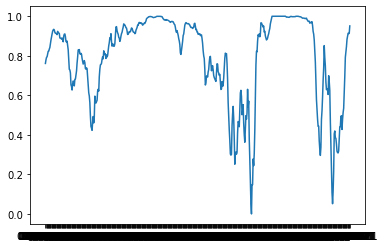

In [173]:
plt.plot(acc_ts_1)

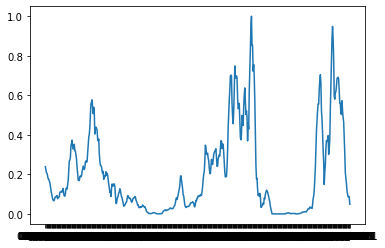

In [174]:
plt.plot(acc_ts_2)

In [184]:
acc_ts = acc_ts.reset_index()
acc_ts

,index,07/01/2020,07/02/2020,07/03/2020,07/04/2020,07/05/2020,07/06/2020,07/07/2020,07/08/2020,07/09/2020,...,12/22/2021,12/23/2021,12/24/2021,12/25/2021,12/26/2021,12/27/2021,12/28/2021,12/29/2021,12/30/2021,12/31/2021
0,48327,0.051089,0.042083,0.032682,0.031182,0.033358,0.028536,0.026521,0.025906,0.025440,...,0.054528,0.057078,0.055447,0.057775,0.058969,0.056747,0.050579,0.046795,0.044798,0.042296
1,48189,0.210879,0.183847,0.143004,0.123313,0.119609,0.108269,0.089188,0.073095,0.067521,...,0.008098,0.007549,0.006805,0.006247,0.005544,0.004431,0.004738,0.004571,0.004513,0.003913
2,48011,0.013979,0.013021,0.012637,0.012951,0.013313,0.012968,0.011670,0.011002,0.010645,...,0.001544,0.001716,0.001967,0.002158,0.002462,0.002360,0.002270,0.002396,0.002478,0.002131
3,48057,0.023179,0.018822,0.012320,0.010815,0.009753,0.008243,0.006872,0.006334,0.005460,...,0.145849,0.138889,0.120955,0.109047,0.109674,0.100102,0.084663,0.076442,0.073078,0.062078
4,48077,0.050406,0.049113,0.047417,0.045537,0.045539,0.042884,0.039463,0.039335,0.039623,...,0.002441,0.001702,0.002336,0.003988,0.003731,0.004190,0.003748,0.004242,0.005163,0.004003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,48205,0.006364,0.005823,0.005555,0.005712,0.005921,0.006003,0.005882,0.005493,0.004783,...,0.001734,0.001811,0.001831,0.001935,0.002155,0.002174,0.001744,0.001722,0.001556,0.001319
250,48249,0.001738,0.001554,0.001227,0.001072,0.000920,0.000782,0.000589,0.000395,0.000298,...,0.014499,0.015263,0.015418,0.013864,0.013206,0.011861,0.010291,0.009210,0.008283,0.006693
251,48505,0.001024,0.000874,0.000792,0.000721,0.000735,0.000644,0.000597,0.000539,0.000469,...,0.000955,0.000811,0.000611,0.000517,0.000439,0.000386,0.000347,0.000323,0.000289,0.000243
252,48453,0.013433,0.012683,0.012294,0.011510,0.010947,0.010564,0.010072,0.009397,0.008905,...,0.013435,0.011647,0.010643,0.008338,0.007260,0.006277,0.005383,0.004461,0.003922,0.003542


In [246]:
daily_death = daily_death.reset_index()

In [253]:
july_to_dec = list(focus_date_death_dict.keys())
july_to_dec.append('index')
july_to_dec

['07/01/2020',
 '07/02/2020',
 '07/03/2020',
 '07/04/2020',
 '07/05/2020',
 '07/06/2020',
 '07/07/2020',
 '07/08/2020',
 '07/09/2020',
 '07/10/2020',
 '07/11/2020',
 '07/12/2020',
 '07/13/2020',
 '07/14/2020',
 '07/15/2020',
 '07/16/2020',
 '07/17/2020',
 '07/18/2020',
 '07/19/2020',
 '07/20/2020',
 '07/21/2020',
 '07/22/2020',
 '07/23/2020',
 '07/24/2020',
 '07/25/2020',
 '07/26/2020',
 '07/27/2020',
 '07/28/2020',
 '07/29/2020',
 '07/30/2020',
 '07/31/2020',
 '08/01/2020',
 '08/02/2020',
 '08/03/2020',
 '08/04/2020',
 '08/05/2020',
 '08/06/2020',
 '08/07/2020',
 '08/08/2020',
 '08/09/2020',
 '08/10/2020',
 '08/11/2020',
 '08/12/2020',
 '08/13/2020',
 '08/14/2020',
 '08/15/2020',
 '08/16/2020',
 '08/17/2020',
 '08/18/2020',
 '08/19/2020',
 '08/20/2020',
 '08/21/2020',
 '08/22/2020',
 '08/23/2020',
 '08/24/2020',
 '08/25/2020',
 '08/26/2020',
 '08/27/2020',
 '08/28/2020',
 '08/29/2020',
 '08/30/2020',
 '08/31/2020',
 '09/01/2020',
 '09/02/2020',
 '09/03/2020',
 '09/04/2020',
 '09/05/20

In [254]:
death_ts[july_to_dec]

,07/01/2020,07/02/2020,07/03/2020,07/04/2020,07/05/2020,07/06/2020,07/07/2020,07/08/2020,07/09/2020,07/10/2020,...,12/23/2021,12/24/2021,12/25/2021,12/26/2021,12/27/2021,12/28/2021,12/29/2021,12/30/2021,12/31/2021,index
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,48001
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,48003
2,0,1,0,1,0,2,0,0,0,1,...,0,0,0,0,0,0,1,0,0,48005
3,0,0,0,0,1,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,48007
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,48009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,48499
250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,48501
251,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,48503
252,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,48505


In [255]:
death_ts = daily_death.merge(acc_county[['index', 'NAME']], left_on='County', right_on='NAME')
death_ts = death_ts.drop(columns=['County', 'NAME'])
death_ts = death_ts[july_to_dec]
death_ts

,07/01/2020,07/02/2020,07/03/2020,07/04/2020,07/05/2020,07/06/2020,07/07/2020,07/08/2020,07/09/2020,07/10/2020,...,12/23/2021,12/24/2021,12/25/2021,12/26/2021,12/27/2021,12/28/2021,12/29/2021,12/30/2021,12/31/2021,index
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,48001
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,48003
2,0,1,0,1,0,2,0,0,0,1,...,0,0,0,0,0,0,1,0,0,48005
3,0,0,0,0,1,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,48007
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,48009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,48499
250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,48501
251,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,48503
252,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,48505


In [183]:
from scipy.stats import pearsonr, spearmanr
from statsmodels.stats.multitest import fdrcorrection
from statsmodels.tsa.stattools import adfuller, kpss, grangercausalitytests


def adf_test(timeseries, verbose=False):
    if verbose:
        print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    if verbose:
        print(dfoutput)
    return dfoutput["p-value"]


def kpss_test(timeseries, verbose=False):
    if verbose:
        print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    if verbose:
        print(kpss_output)
    return kpss_output["p-value"]


def get_most_significant_lag(granger_result):
    # this only considers the p-value of the ssr_ftest
    # we might want to look more deeply into which test is best
    best_lag = 0
    min_pval = 1
    for lag in granger_result.keys():
        pval = granger_result[lag][0]["ssr_ftest"][1]
        if pval < min_pval:
            best_lag = lag
            min_pval = pval
    return (best_lag, min_pval)



In [187]:
from tqdm import tqdm

In [221]:
import numpy as np

<AxesSubplot:>

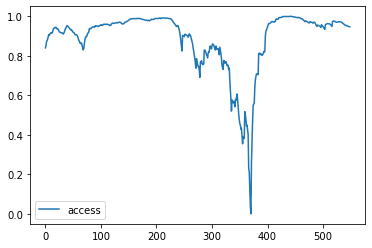

In [229]:
acc_ts_l.plot()

In [238]:
ratio_ts = ratio_ts.reset_index()

In [243]:
death_ts

,07/01/2020,07/02/2020,07/03/2020,07/04/2020,07/05/2020,07/06/2020,07/07/2020,07/08/2020,07/09/2020,07/10/2020,...,12/23/2021,12/24/2021,12/25/2021,12/26/2021,12/27/2021,12/28/2021,12/29/2021,12/30/2021,12/31/2021,index
0,2,1,1,1,1,1,1,0,0,0,...,1,1,1,2,2,3,3,2,2,48001
1,0,0,0,0,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,48003
2,5,5,5,6,5,4,4,4,3,4,...,2,1,1,1,1,1,1,1,1,48005
3,0,0,0,0,1,1,3,4,4,4,...,0,0,0,0,0,0,0,0,0,48007
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,48009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0,0,0,0,0,0,0,0,0,0,...,1,2,2,2,2,3,2,3,2,48499
250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,48501
251,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,48503
252,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,48505


In [258]:
death_ts

,07/01/2020,07/02/2020,07/03/2020,07/04/2020,07/05/2020,07/06/2020,07/07/2020,07/08/2020,07/09/2020,07/10/2020,...,12/23/2021,12/24/2021,12/25/2021,12/26/2021,12/27/2021,12/28/2021,12/29/2021,12/30/2021,12/31/2021,index
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,48001
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,48003
2,0,1,0,1,0,2,0,0,0,1,...,0,0,0,0,0,0,1,0,0,48005
3,0,0,0,0,1,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,48007
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,48009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,48499
250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,48501
251,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,48503
252,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,48505


In [256]:
import warnings
# warnings come from KPSS f stastistic lookup.
warnings.filterwarnings("ignore")

adf_sig = 0.05
kpss_sig = 0.05
max_lag = 30
granger_results = {}
for ind in tqdm(acc_ts["index"], position=0):
    acc_ts_l = acc_ts.loc[acc_ts['index'] == ind].copy(deep=True)
    assert len(acc_ts_l) == 1
    
    acc_ts_l = acc_ts_l.drop(columns=['index'])
    acc_ts_l = acc_ts_l.T
    
    acc_ts_l = pd.Series(acc_ts_l.values.reshape(-1))
#     acc_ts_l = normalize(acc_ts_l)
    acc_ts_l = acc_ts_l.to_frame()
    acc_ts_l.columns = ["access"]
    
    death_ts_l = death_ts.loc[death_ts["index"] == ind].copy(deep=True)
    assert len(death_ts_l) == 1
    death_ts_l = death_ts_l.drop(columns=["index"])
    # print(list(death_ts.columns))
    death_ts_l = death_ts_l.T
    
    death_ts_l = pd.Series(death_ts_l.values.reshape(-1))
#     death_ts_l = normalize(death_ts_l)
    death_ts_l = death_ts_l.to_frame() 
    
    death_ts_l.columns = ["death"]
    
    x = np.diff(acc_ts_l["access"])[1:]
    x = np.diff(x)[1:]
    y = np.diff(death_ts_l["death"])[1:]
    y = np.diff(y)[1:]
    data = pd.DataFrame({"access": x, "death": y})
    
    
    try:
        # check for stationarity
        pval = adf_test(x)
        if pval >= adf_sig:
            print(f"{ind} access is non-stationary per adf with pval {pval}")
            assert False
        pval = adf_test(y)
        if pval >= adf_sig:
            print(f"{ind} death is non-stationary per adf with pval {pval}")
            assert False
        pval = kpss_test(x)
        if pval <= kpss_sig:
            print(f"{ind} access is non-stationary per kpss with pval {pval}")
            assert False
        pval = kpss_test(y)
        if pval <= kpss_sig:
            print(f"{ind} death is non-stationary per kpss with pval {pval}")
            assert False
        
        result = grangercausalitytests(data, maxlag=max_lag, verbose=False)
        lag, pval = get_most_significant_lag(result)
        granger_results[ind] = dict()
        granger_results[ind]["lag"] = lag
        granger_results[ind]["pval"] = pval
    except:
        print(f"{ind} failed")
        granger_results[ind] = dict()
        granger_results[ind]["lag"] = np.nan
        granger_results[ind]["pval"] = np.nan

  5%|▍         | 12/254 [00:02<00:42,  5.75it/s]

48247 failed


  7%|▋         | 18/254 [00:03<00:52,  4.51it/s]

48413 failed


  9%|▊         | 22/254 [00:04<00:40,  5.80it/s]

48107 failed


 12%|█▏        | 31/254 [00:06<00:57,  3.90it/s]

48311 failed
48435 failed


 15%|█▍        | 37/254 [00:07<00:48,  4.49it/s]

48045 failed


 18%|█▊        | 46/254 [00:09<00:46,  4.50it/s]

48359 failed


 23%|██▎       | 59/254 [00:13<01:02,  3.12it/s]

48211 failed


 28%|██▊       | 70/254 [00:16<00:59,  3.07it/s]

48137 failed


 33%|███▎      | 85/254 [00:20<00:38,  4.42it/s]

48385 failed


 35%|███▌      | 90/254 [00:21<00:38,  4.29it/s]

48345 failed


 38%|███▊      | 96/254 [00:23<00:59,  2.67it/s]

48377 failed
48489 access is non-stationary per kpss with pval 0.04166666666667782
48489 failed


 42%|████▏     | 106/254 [00:26<00:41,  3.58it/s]

48187 death is non-stationary per kpss with pval 0.041666666666656846
48187 failed


 46%|████▌     | 117/254 [00:29<00:57,  2.39it/s]

48173 failed


 48%|████▊     | 122/254 [00:31<00:37,  3.53it/s]

48229 failed


 49%|████▉     | 125/254 [00:31<00:29,  4.36it/s]

48097 failed


 52%|█████▏    | 132/254 [00:33<00:31,  3.86it/s]

48235 failed


 55%|█████▍    | 139/254 [00:35<00:29,  3.96it/s]

48075 access is non-stationary per kpss with pval 0.041666666666662994
48075 failed
48243 failed


 59%|█████▉    | 151/254 [00:38<00:32,  3.14it/s]

48073 access is non-stationary per kpss with pval 0.04166666666667185
48073 failed


 65%|██████▍   | 164/254 [00:42<00:27,  3.24it/s]

48443 failed


 69%|██████▊   | 174/254 [00:45<00:28,  2.77it/s]

48447 failed


 72%|███████▏  | 183/254 [00:48<00:26,  2.70it/s]

48363 failed


 76%|███████▌  | 193/254 [00:51<00:19,  3.14it/s]

48267 failed


 78%|███████▊  | 197/254 [00:52<00:16,  3.42it/s]

48263 failed


 78%|███████▊  | 199/254 [00:53<00:13,  4.05it/s]

48301 failed
48125 failed


 82%|████████▏ | 209/254 [00:55<00:13,  3.42it/s]

48269 failed


 84%|████████▍ | 213/254 [00:56<00:11,  3.61it/s]

48261 failed


 90%|█████████ | 229/254 [01:01<00:07,  3.22it/s]

48393 failed


 97%|█████████▋| 247/254 [01:07<00:02,  3.20it/s]

48319 failed


 98%|█████████▊| 249/254 [01:07<00:01,  3.95it/s]

48205 failed


100%|██████████| 254/254 [01:08<00:00,  3.69it/s]


In [257]:
lags = [granger_results[ind]["lag"] for ind in acc_county["index"]]
pvals = [granger_results[ind]["pval"] for ind in acc_county["index"]]
result_df = pd.DataFrame({"index": acc_county["index"], "lag": lags, "pvals": pvals})
result_df.dropna(subset=["lag", "pvals"], inplace=True)
result_df

,index,lag,pvals
0,48327,1.0,0.993223
1,48189,3.0,0.235814
2,48011,25.0,0.145902
3,48057,2.0,0.566022
4,48077,1.0,0.849231
...,...,...,...
248,48441,1.0,0.548277
250,48249,1.0,0.524947
251,48505,1.0,0.999674
252,48453,9.0,0.987522


In [233]:
result_df['pvals'].min()

0.07547713095856738

In [261]:
acc_ts

,index,07/01/2020,07/02/2020,07/03/2020,07/04/2020,07/05/2020,07/06/2020,07/07/2020,07/08/2020,07/09/2020,...,12/22/2021,12/23/2021,12/24/2021,12/25/2021,12/26/2021,12/27/2021,12/28/2021,12/29/2021,12/30/2021,12/31/2021
0,48327,0.051089,0.042083,0.032682,0.031182,0.033358,0.028536,0.026521,0.025906,0.025440,...,0.054528,0.057078,0.055447,0.057775,0.058969,0.056747,0.050579,0.046795,0.044798,0.042296
1,48189,0.210879,0.183847,0.143004,0.123313,0.119609,0.108269,0.089188,0.073095,0.067521,...,0.008098,0.007549,0.006805,0.006247,0.005544,0.004431,0.004738,0.004571,0.004513,0.003913
2,48011,0.013979,0.013021,0.012637,0.012951,0.013313,0.012968,0.011670,0.011002,0.010645,...,0.001544,0.001716,0.001967,0.002158,0.002462,0.002360,0.002270,0.002396,0.002478,0.002131
3,48057,0.023179,0.018822,0.012320,0.010815,0.009753,0.008243,0.006872,0.006334,0.005460,...,0.145849,0.138889,0.120955,0.109047,0.109674,0.100102,0.084663,0.076442,0.073078,0.062078
4,48077,0.050406,0.049113,0.047417,0.045537,0.045539,0.042884,0.039463,0.039335,0.039623,...,0.002441,0.001702,0.002336,0.003988,0.003731,0.004190,0.003748,0.004242,0.005163,0.004003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,48205,0.006364,0.005823,0.005555,0.005712,0.005921,0.006003,0.005882,0.005493,0.004783,...,0.001734,0.001811,0.001831,0.001935,0.002155,0.002174,0.001744,0.001722,0.001556,0.001319
250,48249,0.001738,0.001554,0.001227,0.001072,0.000920,0.000782,0.000589,0.000395,0.000298,...,0.014499,0.015263,0.015418,0.013864,0.013206,0.011861,0.010291,0.009210,0.008283,0.006693
251,48505,0.001024,0.000874,0.000792,0.000721,0.000735,0.000644,0.000597,0.000539,0.000469,...,0.000955,0.000811,0.000611,0.000517,0.000439,0.000386,0.000347,0.000323,0.000289,0.000243
252,48453,0.013433,0.012683,0.012294,0.011510,0.010947,0.010564,0.010072,0.009397,0.008905,...,0.013435,0.011647,0.010643,0.008338,0.007260,0.006277,0.005383,0.004461,0.003922,0.003542


In [267]:
death_ts

,07/01/2020,07/02/2020,07/03/2020,07/04/2020,07/05/2020,07/06/2020,07/07/2020,07/08/2020,07/09/2020,07/10/2020,...,12/23/2021,12/24/2021,12/25/2021,12/26/2021,12/27/2021,12/28/2021,12/29/2021,12/30/2021,12/31/2021,index
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,48001
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,48003
2,0,1,0,1,0,2,0,0,0,1,...,0,0,0,0,0,0,1,0,0,48005
3,0,0,0,0,1,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,48007
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,48009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,48499
250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,48501
251,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,48503
252,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,48505


In [269]:
acc_ts_l

,102
index,NaN
07/01/2020,NaN
07/02/2020,NaN
07/03/2020,NaN
07/04/2020,NaN
...,...
12/27/2021,NaN
12/28/2021,NaN
12/29/2021,NaN
12/30/2021,NaN


In [ ]:
def normalize_r(df):
    
    values = df.values[0][1:]
    
#     nor_series = series.copy(deep=True)
    for idx, val in series.iteritems():
        nor_series[idx] =  (series.min()-val) / (series.max() - series.min()) + 1
        
    return nor_series
    
def normalize(series):
    
    nor_series = series.copy(deep=True)
    for idx, val in series.iteritems():
        nor_series[idx] = (val - series.min()) / (series.max() - series.min())
        
    return nor_series

In [279]:
aaa = acc_ts.loc[acc_ts['index'] == county_num]
# aaa = aaa.drop(columns=['index'])
aaa

,index,07/01/2020,07/02/2020,07/03/2020,07/04/2020,07/05/2020,07/06/2020,07/07/2020,07/08/2020,07/09/2020,...,12/22/2021,12/23/2021,12/24/2021,12/25/2021,12/26/2021,12/27/2021,12/28/2021,12/29/2021,12/30/2021,12/31/2021
102,48201,0.006368,0.006264,0.005623,0.005373,0.005124,0.004889,0.004275,0.003843,0.003417,...,0.005391,0.004836,0.004235,0.003682,0.003405,0.003021,0.002979,0.002731,0.002557,0.00243


In [ ]:
for val in aaa:
    

In [286]:
aaa.min()

0.001023197227879

In [284]:
aaa = aaa.values[0][1:]


In [277]:
normalize(aaa)

,07/01/2020,07/02/2020,07/03/2020,07/04/2020,07/05/2020,07/06/2020,07/07/2020,07/08/2020,07/09/2020,07/10/2020,...,12/22/2021,12/23/2021,12/24/2021,12/25/2021,12/26/2021,12/27/2021,12/28/2021,12/29/2021,12/30/2021,12/31/2021
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Harris 48201


InvalidIndexError: (slice(None, None, None), None)

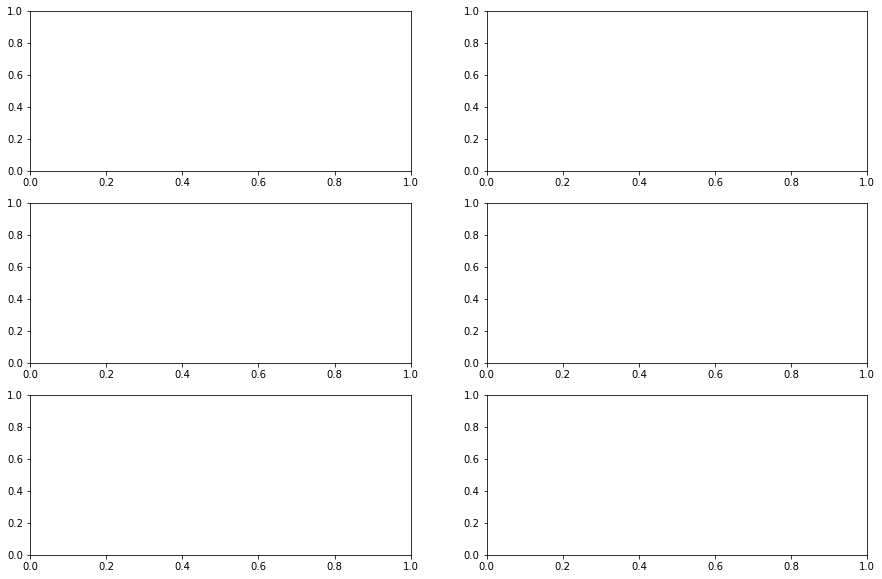

In [268]:
county_names = ['Harris', 'Dallas', 'Tarrant', 'Bexar', 'Travis', 'Brazos']

fig, axes = plt.subplots(3, 2, figsize=(15, 10))

for idx, county_name in enumerate(county_names):
    ax = axes.reshape(-1)[idx]
#     county_name = 'Tarrant'
    county_num = acc_county.loc[acc_county['NAME'] == county_name, 'index'].values[0]
    print(county_name, county_num)
    acc_ts_l = normalize(acc_ts.loc[acc_ts['index'] == county_num].T)
    ratio_ts_l = normalize(ratio_ts.loc[ratio_ts['index'] == county_num].T)
    nor_death_l = normalize(death_ts.loc[death_ts['index'] == county_name].T)

    ax.plot(focus_date_death_dict.keys(), acc_ts_l, label='Accessibility', color='black')
    ax.plot(focus_date_death_dict.keys(), ratio_ts_l, label='Ratio', color='blue')
    ax.plot(focus_date_death_dict.keys(), nor_death_l, label='Death', color='red')

    plt.legend()

    ax.set_xticks([date for date in focus_date_death_dict.keys() if date[3:5] == '01']) # The locations that ticks will be displayed.
    ax.set_xticklabels([date for date in focus_date_death_dict.keys() if date[3:5] == '01'], rotation=40)

    ax.text(0, 1, county_name)
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


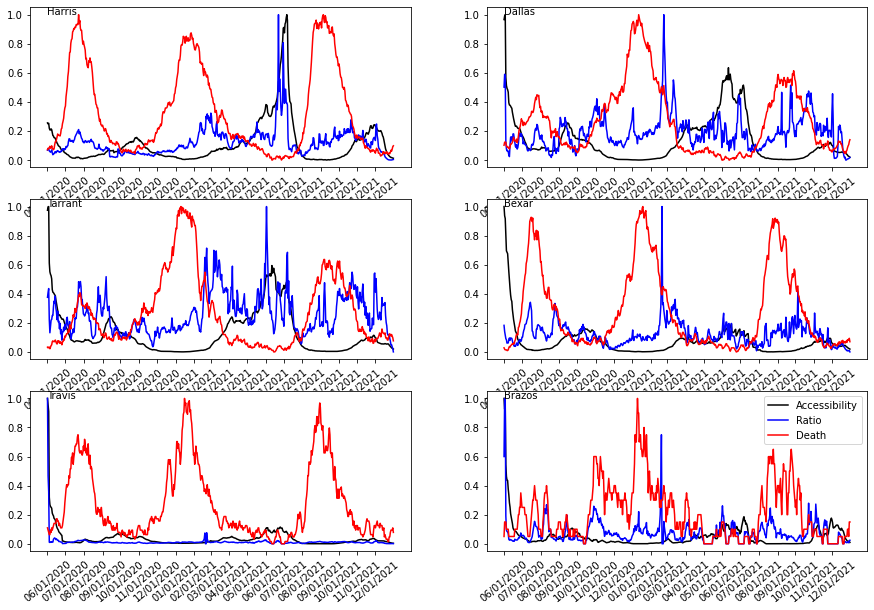

In [117]:
county_names = ['Harris', 'Dallas', 'Tarrant', 'Bexar', 'Travis', 'Brazos']

fig, axes = plt.subplots(3, 2, figsize=(15, 10))

for idx, county_name in enumerate(county_names):
    ax = axes.reshape(-1)[idx]
#     county_name = 'Tarrant'
    county_num = acc_county.loc[acc_county['NAME'] == county_name, 'index'].values[0]

    acc_ts_l = normalize(acc_ts.loc[county_num])
    ratio_ts_l = normalize(ratio_ts.loc[county_num])
    nor_death_l = normalize(accumulate_death.loc[county_name])

    ax.plot(focus_date_death, acc_ts_l, label='Accessibility', color='black')
    ax.plot(focus_date_death, ratio_ts_l, label='Ratio', color='blue')
    ax.plot(focus_date_death, nor_death_l, label='Death', color='red')

    plt.legend()

    ax.set_xticks([date for date in focus_date_death if date[3:5] == '01']) # The locations that ticks will be displayed.
    ax.set_xticklabels([date for date in focus_date_death if date[3:5] == '01'], rotation=40)

    ax.text(0, 1, county_name)
plt.show()

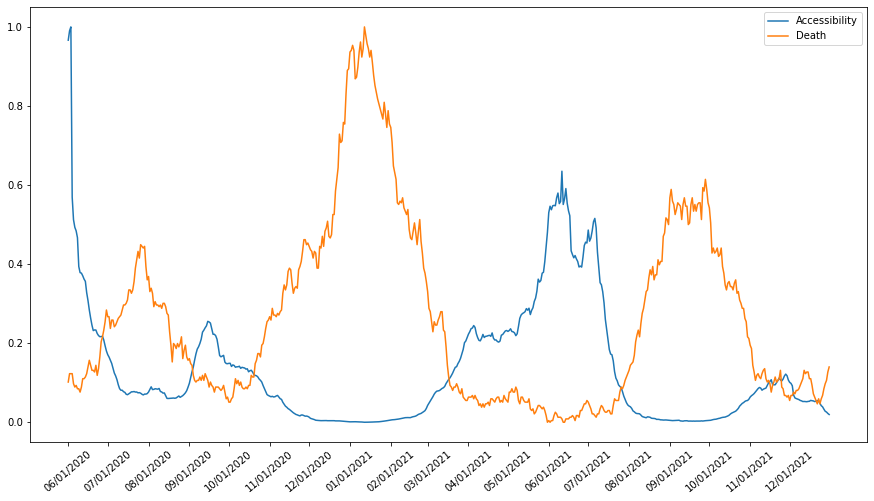

In [89]:
fig, ax = plt.subplots(figsize=(15, 8))

county_name = 'Dallas'
county_num = acc_county.loc[acc_county['NAME'] == county_name, 'index'].values[0]
acc_ts_l = normalize(acc_ts.loc[county_num])
nor_death_l = normalize(accumulate_death.loc[county_name])

ax.plot(focus_date_death, acc_ts_l, label='Accessibility')
ax.plot(focus_date_death, nor_death_l, label='Death')

plt.legend()

ax.set_xticks([date for date in focus_date_death if date[3:5] == '01']) # The locations that ticks will be displayed.
ax.set_xticklabels([date for date in focus_date_death if date[3:5] == '01'], rotation=40)

plt.show()

In [78]:
def normalize(series):
    
    nor_series = series.copy(deep=True)
    for idx, val in series.iteritems():
        nor_series[idx] = (val - series.min()) / (series.max() - series.min())
        
    return nor_series
    

nor_death_harris = normalize(accumulate_death.loc['Harris'])
nor_death_harris

06/01/2020    0.070946
06/02/2020    0.081081
06/03/2020    0.077703
06/04/2020    0.084459
06/05/2020    0.094595
                ...   
12/27/2021    0.067568
12/28/2021    0.060811
12/29/2021    0.074324
12/30/2021    0.091216
12/31/2021    0.097973
Name: Harris, Length: 579, dtype: float64

<AxesSubplot:>

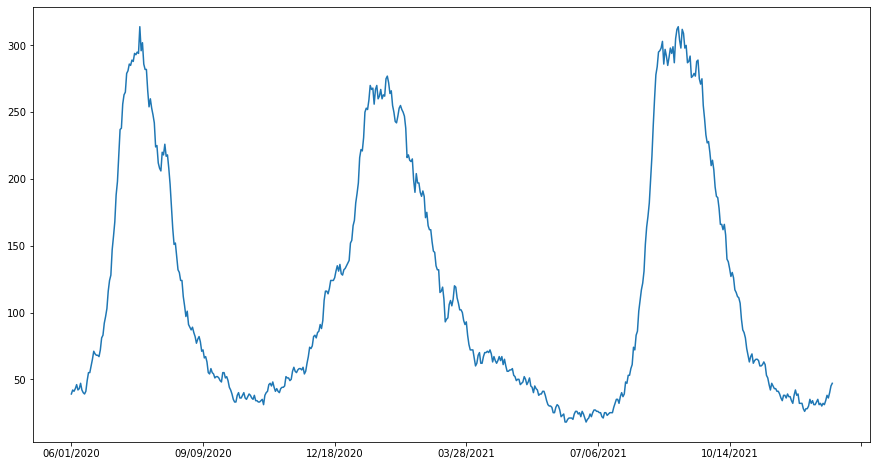

In [76]:
accumulate_death.loc['Harris'].plot(figsize=(15, 8))